<a href="https://colab.research.google.com/github/kareembadrsaber/electropi.ai_projects/blob/master/DataPrepKit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the path to the data file: /content/sample_data/california_housing_test.csv
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB
None

Data Description:
         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.57

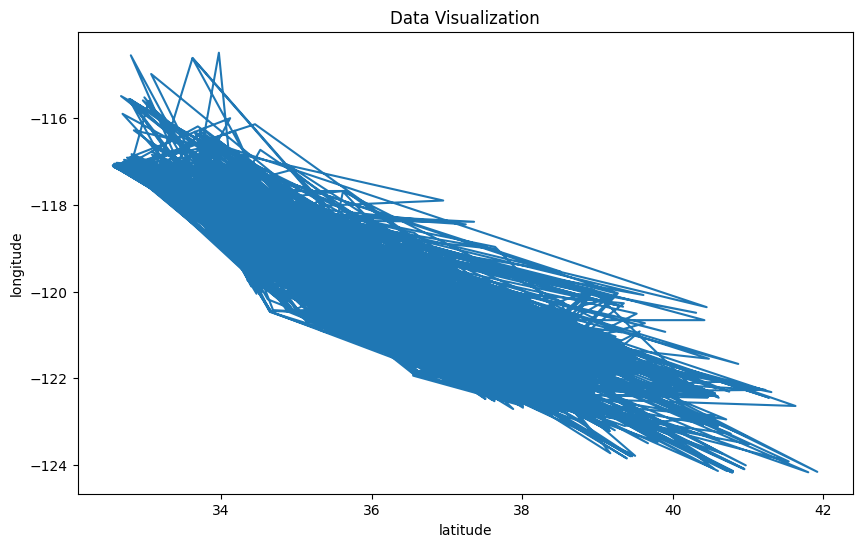

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Reading Functions
def read_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xlsx') or file_path.endswith('.xls'):
        return pd.read_excel(file_path)
    elif file_path.endswith('.json'):
        return pd.read_json(file_path)
    else:
        raise ValueError("Unsupported file format. Supported formats are: CSV, Excel, JSON")

# Data Exploration and Analysis (EDA)
def explore_data(data):
    print("Data Info:")
    print(data.info())
    print("\nData Description:")
    print(data.describe())
    print("\nData Head:")
    print(data.head())

# Handling Missing Values Functions
def handle_missing_values(data):
    # Identify numeric and categorical columns
    numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()

    # Handling missing values in numeric columns
    for col in numeric_cols:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mean(), inplace=True)

    # Handling missing values in categorical columns
    for col in categorical_cols:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].mode()[0], inplace=True)

# Categorical Data Encoding Functions
def encode_categorical_data(data):
    encoded_data = pd.get_dummies(data)
    return encoded_data

# Visualization Function
def plot_data(data, x_column, y_column):
    plt.figure(figsize=(10,  6))
    plt.plot(data[x_column], data[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title('Data Visualization')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Ask user to input data path
    file_path = input("Enter the path to the data file: ")

    # Read data
    df = read_data(file_path)

    # Explore data
    explore_data(df)

    # Handle missing values
    handle_missing_values(df)

    # Encode categorical data
    df_encoded = encode_categorical_data(df)

    # Plot the data
    # Print column names in df_encoded
    print("Column names in df_encoded:", df_encoded.columns)
    # Select x and y columns for plotting
    x_column_name = input("Enter the name of the x column: ")
    y_column_name = input("Enter the name of the y column: ")
    plot_data(df_encoded, x_column_name, y_column_name)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')